In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv("credit_risk_dataset.csv")

print(data.head())

   index  CounterpartyID           EAD      PD   LGD         Industry  \
0    0.0           101.0  4.823912e+08  0.0321  0.45  Pharmaceuticals   
1    1.0           102.0  8.945203e+08  0.0845  0.33           Energy   
2    2.0           103.0  3.781129e+08  0.0154  0.58       Technology   
3    3.0           104.0  1.120385e+09  0.1723  0.62           Retail   
4    4.0           105.0  2.654931e+08  0.0438  0.41          Telecom   

   Country Rating  
0  Germany      A  
1       US    BBB  
2    Japan     AA  
3    India     BB  
4       UK     A-  


##  **Credit Risk Capital Calculations**

### --> Pillar 1 – Capital Requirement
### --> Stressed Capital Required for CCAR
### --> Expected Credit Loss for IFRS-9


In [ ]:
# Calculate Pillar 1 Capital Requirement (Basel III)
# Formula: EAD * PD * LGD * 12.5 (12.5 converts to RWA equivalent)
data['Capital_Requirement_PillarI'] = data['EAD'] * data['PD'] * data['LGD'] * 12.5

cap_req=data['EAD'] * data['PD'] * data['LGD'] * 12.5

# to check if coloumn is refelcting the changes
print(data[['CounterpartyID', 'Capital_Requirement_PillarI']].head())
print()

print("the capital required under pillar-1 is:",cap_req)



# here I am shocking PD by +50% and LGD by +20% to simulate stressed scenario
data['Stressed_PD'] = data['PD'] * 1.5
data['Stressed_LGD'] = data['LGD'] * 1.2

data['Capital_Requirement_CCAR'] = data['EAD'] * data['Stressed_PD'] * data['Stressed_LGD'] * 12.5

cap_req_strs_scenario= data['EAD'] * data['Stressed_PD'] * data['Stressed_LGD'] * 12.5
print()
print("capital required under stressed scenario is:",cap_req_strs_scenario)



#confirmation of updated csv
print()
print(data[['CounterpartyID', 'Capital_Requirement_CCAR']].head())

print()
# Expected Credit Loss IFRS 9
# Simple formula: ECL = EAD * PD * LGD
data['Expected_Credit_Loss_IFRS9'] = data['EAD'] * data['PD'] * data['LGD']

exp_cr_loss= data['EAD'] * data['PD'] * data['LGD']

print("expected credit loss for ifrs-9 is:", exp_cr_loss)
print()#for line breaks

print(data[['CounterpartyID', 'Expected_Credit_Loss_IFRS9']].head())
data = data.dropna()

   CounterpartyID  Capital_Requirement_PillarI
0           101.0                 8.710177e+07
1           102.0                 3.117962e+08
2           103.0                 4.221630e+07
3           104.0                 1.496078e+09
4           105.0                 5.959657e+07

the capital required under pillar-1 is: 0     8.710177e+07
1     3.117962e+08
2     4.221630e+07
3     1.496078e+09
4     5.959657e+07
5     4.859484e+08
6     2.539386e+08
7     1.542564e+09
8     7.645527e+07
9     6.799489e+07
10    5.433562e+08
11    1.477556e+08
12    7.695054e+08
13    6.046451e+08
14    8.583113e+07
15             NaN
dtype: float64

capital required under stressed scenario is: 0     1.567832e+08
1     5.612332e+08
2     7.598934e+07
3     2.692940e+09
4     1.072738e+08
5     8.747071e+08
6     4.570894e+08
7     2.776616e+09
8     1.376195e+08
9     1.223908e+08
10    9.780412e+08
11    2.659601e+08
12    1.385110e+09
13    1.088361e+09
14    1.544960e+08
15             NaN
dtype: f

##  **Graphical Representation**

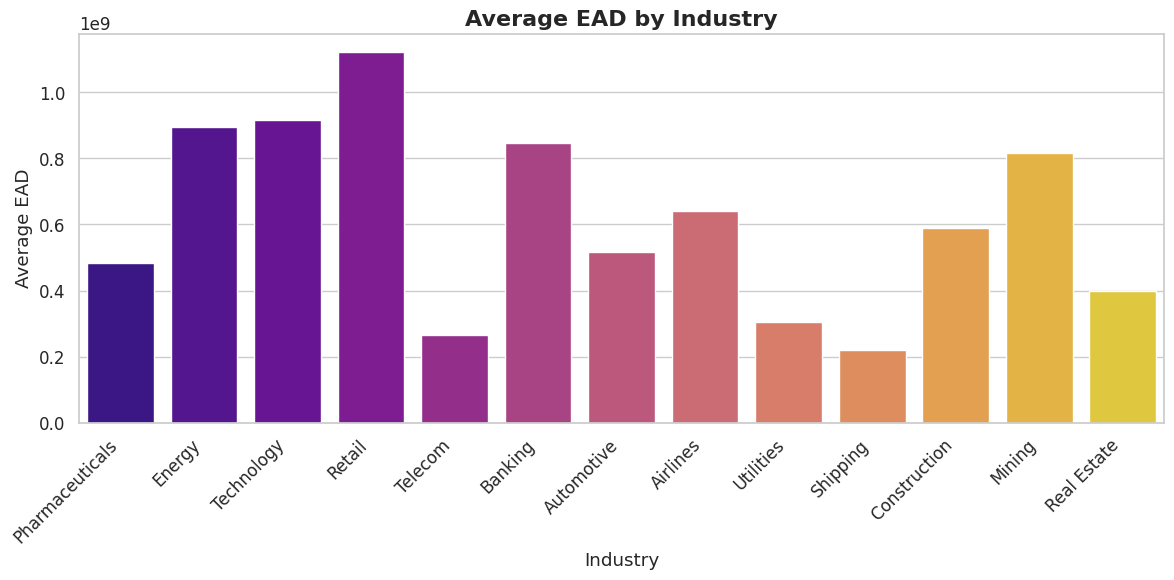

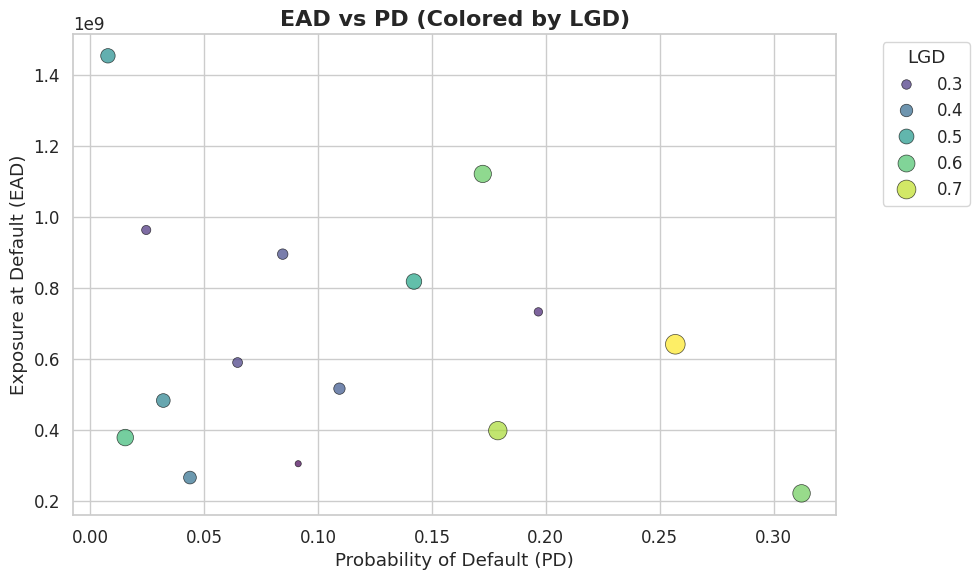

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='Industry', y='EAD', hue='Industry',
            estimator=np.mean, errorbar=None, palette='plasma', legend=False)
plt.xticks(rotation=45, ha='right')
plt.title('Average EAD by Industry', fontsize=16, weight='bold')
plt.xlabel('Industry')
plt.ylabel('Average EAD')
plt.tight_layout()
plt.show()

print()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='PD', y='EAD', hue='LGD',
                palette='viridis', size='LGD', sizes=(20, 200), alpha=0.7, edgecolor='black')
plt.title('EAD vs PD (Colored by LGD)', fontsize=16, weight='bold')
plt.xlabel('Probability of Default (PD)')
plt.ylabel('Exposure at Default (EAD)')
plt.legend(title='LGD', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()




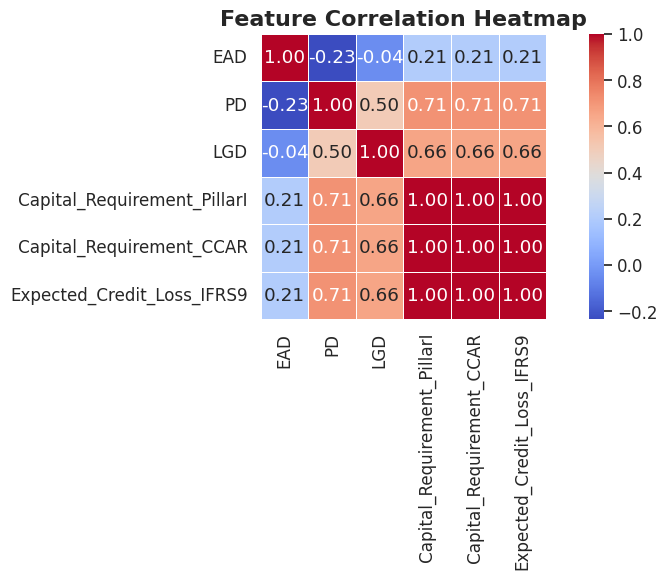

In [ ]:
# Correlation heatmap for numerical features
plt.figure(figsize=(10, 6))
corr_matrix = data[['EAD', 'PD', 'LGD',
                    'Capital_Requirement_PillarI',
                    'Capital_Requirement_CCAR',
                    'Expected_Credit_Loss_IFRS9']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True)
plt.title('Feature Correlation Heatmap', fontsize=16, weight='bold')
plt.tight_layout()
plt.show()
